Using TensorFlow backend.


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 0s 497us/step - loss: 0.0954 - val_loss: 0.0069
Epoch 2/200
760/760 [==============================] - 0s 47us/step - loss: 0.0416 - val_loss: 0.0208
Epoch 3/200
760/760 [==============================] - 0s 53us/step - loss: 0.0321 - val_loss: 0.0237
Epoch 4/200
760/760 [==============================] - 0s 45us/step - loss: 0.0282 - val_loss: 0.0084
Epoch 5/200
760/760 [==============================] - 0s 43us/step - loss: 0.0299 - val_loss: 0.0283
Epoch 6/200
760/760 [==============================] - 0s 45us/step - loss: 0.0286 - val_loss: 0.0171
Epoch 7/200
760/760 [==============================] - 0s 42us/step - loss: 0.0261 - val_loss: 0

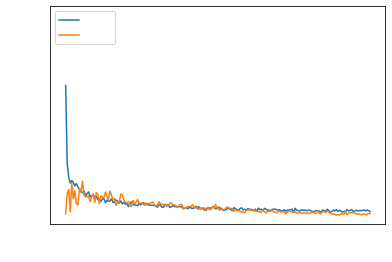

In [1]:
import time_series_numerical_predictor as predictor
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = predictor.create_dataset(train, look_back)
x_val, y_val = predictor.create_dataset(val, look_back)
x_test, y_test = predictor.create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))
predictor.show_model_learning_process(hist)

Train Score:  0.006902177798512735
Validataion Score:  0.006960612080163426
Test Score:  0.006960612080163426


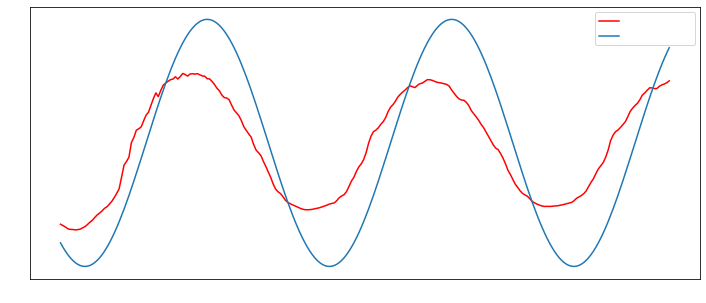

In [2]:
# 6. 모델 평가하기
predictor.evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test)

# 7. 모델 사용하기
predictor.use_model(model, x_test, y_test, batch_size=32)